### PHASE 1: ENVIRONMENT SETUP AND DATA LOADING

#### Importing the Python libraries required for the research.

In [3]:
# 'pandas' and 'numpy' are the foundations of data manipulation, while 'matplotlib' and 'seaborn' handle visualization.
# For machine learning tasks, I use the 'scikit-learn' library, which is an industry standard.
# The 'shap' library serves as the basis for 'explainable AI' (XAI) implementation.

# For data manipulation
import pandas as pd
# For numerical operations
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Tools required for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For model explanation (XAI)
import shap

# Aesthetic settings for thesis figures (clean, white background, readable size)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

print("Libraries imported.")

Libraries imported.


#### 1. LOADING THE DATABASE

In [5]:
# The source file is the HR Analytics dataset published by IBM.
# Loading data into a pandas DataFrame for further analysis.

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("Database loaded successfully.")

Database loaded successfully.


#### 2. PRELIMINARY DATA EXPLORATION

In [116]:
# The purpose of the structural overview is to verify dataset dimensions, data types, and missing values.
# This step is essential for defining the data cleaning strategy.

print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nExamination of data types and missing values:")
df.info()


First 5 rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Examination of data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 

**Observation:** Based on the .info() output, there are no missing (null) values; therefore, data imputation is not required.

#### 3. DESCRIPTIVE STATISTICS AND NOISE FILTERING

In [118]:
# Examining the distribution of numerical variables using the .describe() method.
# Goal: identify constant (zero variance) variables that carry no information for the model.

print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
s

In [120]:
print("\n--- Checking constant variable: 'Over18' ---")
print(f"Unique values of 'Over18': {df['Over18'].unique()}")


--- Checking constant variable: 'Over18' ---
Unique values of 'Over18': ['Y']


#### 4. DATA CLEANING AND DIMENSIONALITY REDUCTION (FEATURE SELECTION)

In [13]:
# Based on the analysis above, I identified that 'EmployeeCount', 'StandardHours', and 'Over18'
# variables have zero variance (constant values), thus providing no predictive value regarding attrition.
# 'EmployeeNumber' is merely a technical identifier (ID) that could lead to overfitting,
# therefore, I am removing these variables to reduce noise and improve model efficiency.

In [122]:
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df_cleaned = df.drop(columns=columns_to_drop)

print(f"\nColumns ({columns_to_drop}) successfully removed.")
print(f"Cleaned dataset size: {df_cleaned.shape}")


Columns (['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']) successfully removed.
Cleaned dataset size: (1470, 31)


### PHASE 2: DATA PREPARATION (FEATURE ENGINEERING)

##### Machine learning algorithms perform mathematical operations; therefore, text-based categories must be converted into a numerical format.

#### 1. Mapping Binary Variables

In [124]:
# I manually encode 'Yes'/'No' and 'Male'/'Female' values to 0/1,
# to preserve interpretability (e.g., Attrition: 1 = Left).
df_processed = df_cleaned.copy()

df_processed['Attrition'] = df_processed['Attrition'].map({'Yes': 1, 'No': 0})
df_processed['OverTime'] = df_processed['OverTime'].map({'Yes': 1, 'No': 0})
df_processed['Gender'] = df_processed['Gender'].map({'Male': 1, 'Female': 0})

print("Binary variables ('Attrition', 'OverTime', 'Gender') encoded to 0/1.")

Binary variables ('Attrition', 'OverTime', 'Gender') encoded to 0/1.


#### 2. Handling Categorical Variables (One-Hot Encoding)

In [20]:
# For nominal variables (e.g., Department, Job Role), I apply One-Hot Encoding instead of Label Encoding.
# This avoids the model inferring a false hierarchy (ordinal relationship) between categories
# (e.g., preventing the HR department from being evaluated as "greater" than Sales).

In [126]:
# Identifying remaining text (object) type columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns

print(f"\nColumns pending One-Hot Encoding: {list(categorical_cols)}")

# The pd.get_dummies() function performs the encoding.
# The 'drop_first=True' parameter is critical to avoid multicollinearity (Dummy Variable Trap),
# which would cause distortion especially in linear models (e.g., Logistic Regression).
df_model_ready = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f"Dataset One-Hot encoded. New size (with more columns): {df_model_ready.shape}")
print("\n--- First 5 rows of the model-ready dataset ---")
print(df_model_ready.head())


Columns pending One-Hot Encoding: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
Dataset One-Hot encoded. New size (with more columns): (1470, 45)

--- First 5 rows of the model-ready dataset ---
   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2       0          94               3         2  ...   
1                        3       1          61               2         2  ...   
2                        4       1          92               2         1  ...   
3                        4       0          56               3         1  ...   

In [128]:
# Creating a copy 'df_model_ready' for modeling
# Here we convert EVERYTHING to numbers (One-Hot Encoding)
categorical_cols = df_processed.select_dtypes(include=['object']).columns
df_model_ready = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f"Model-ready DataFrame created ({df_model_ready.shape[1]} columns).")

Model-ready DataFrame created (45 columns).


### PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)

In this section, I explore the relationship between attrition and explanatory variables using visualization tools. **Goal:** Establishing preliminary hypotheses and uncovering the "business story".

#### 1. Examination of Target Variable Distribution

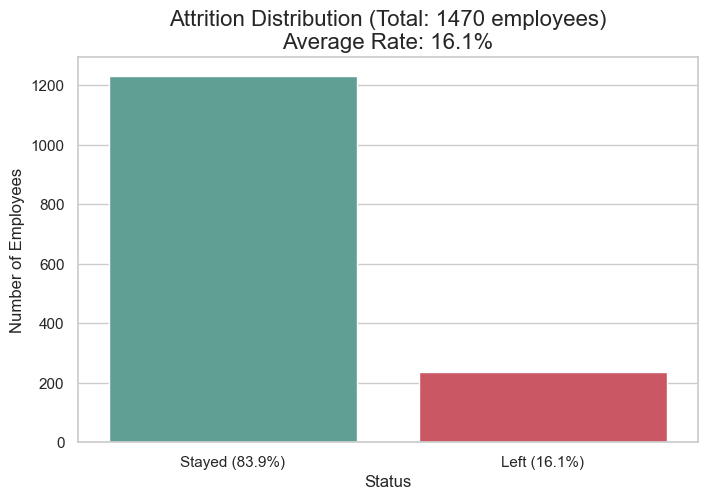

In [132]:
plt.figure(figsize=(8, 5))
attrition_rate = df_processed['Attrition'].mean()

ax = sns.countplot(x='Attrition', data=df_processed, palette=["#5A9", "#D45"],hue='Attrition',legend=False)
plt.title(f'Attrition Distribution (Total: 1470 employees)\nAverage Rate: {attrition_rate:.1%}', fontsize=16)
plt.xticks([0, 1], ['Stayed (83.9%)', 'Left (16.1%)'])
plt.ylabel('Number of Employees')
plt.xlabel('Status')
plt.show()

**Observation:**

The figure confirms that the dataset is highly imbalanced.

The attrition rate is only 16.1%, which necessitates special attention during model selection and evaluation (specifically balancing Recall vs. Accuracy).

#### 2. Examination of Key Business Hypotheses (Impact of Overtime)

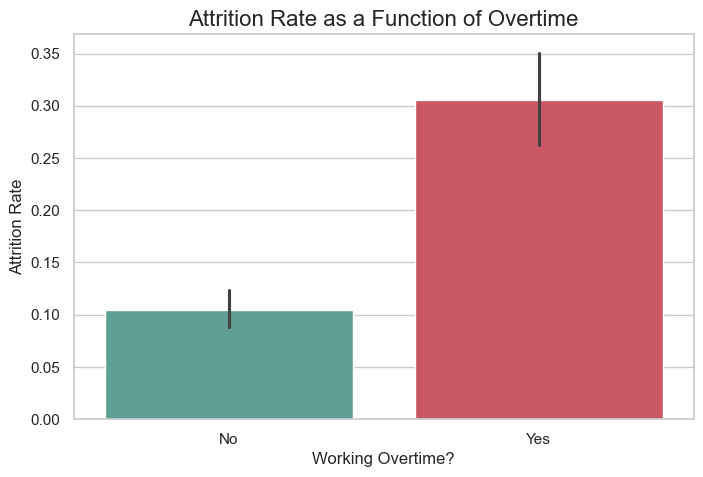

In [134]:
plt.figure(figsize=(8, 5))
sns.barplot(x='OverTime', y='Attrition', data=df_processed, palette=["#5A9", "#D45"],hue='OverTime',legend=False)
plt.title('Attrition Rate as a Function of Overtime', fontsize=16)
plt.ylabel('Attrition Rate')
plt.xlabel('Working Overtime?')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**Observation:**

The correlation is dramatic. The attrition rate among those working overtime (30.5%) is nearly three times that of those who do not (10.4%). This clearly indicates the risk of burnout.

#### 3. Identifying Organizational "Hotspots" (Job Roles)

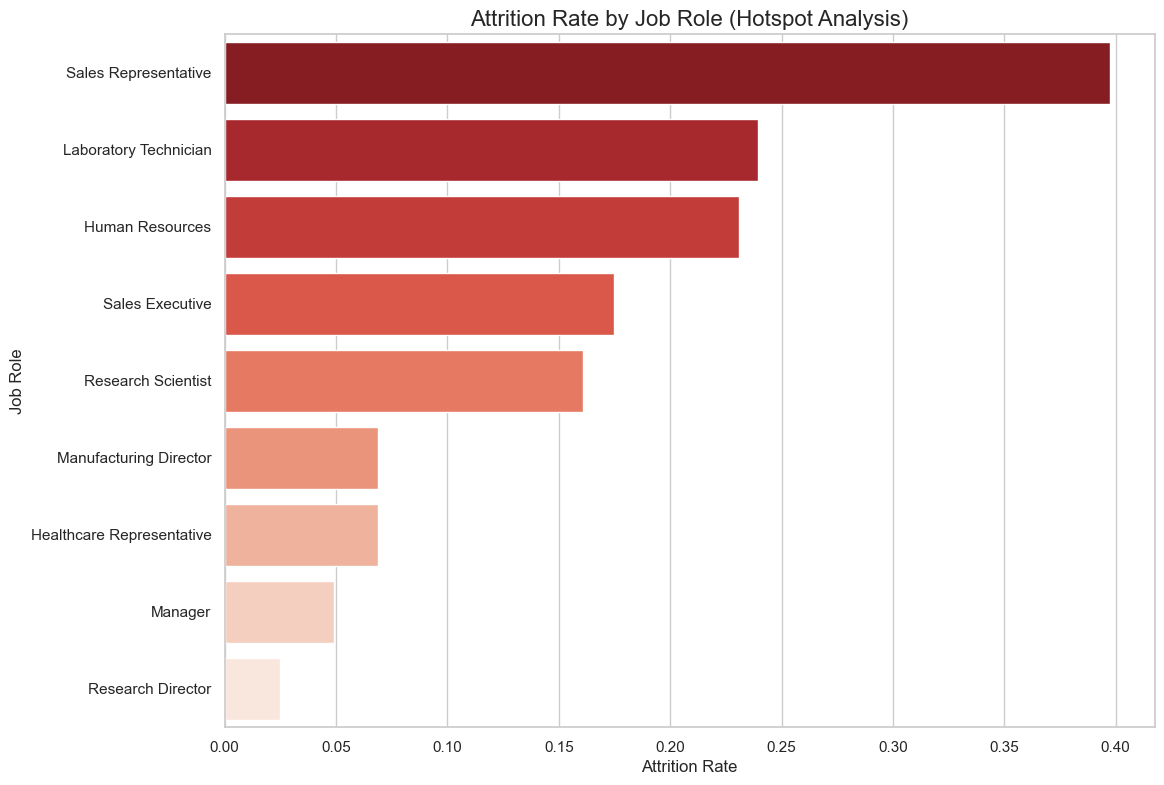

In [138]:
# Examining which positions have the highest risk.

plt.figure(figsize=(12, 9))

# Calculating average attrition per job role, then sorting
job_role_attrition = df_processed.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)

sns.barplot(x=job_role_attrition.values, y=job_role_attrition.index, orient='h', palette="Reds_r", hue=job_role_attrition.index,legend=False)

plt.title('Attrition Rate by Job Role (Hotspot Analysis)', fontsize=16)
plt.xlabel('Attrition Rate')
plt.ylabel('Job Role')
plt.show()

**Observation:**

The 'Sales Representative' position is at outstanding risk (~40% attrition).
This area may require immediate HR intervention.

#### 4. Job Level Analysis

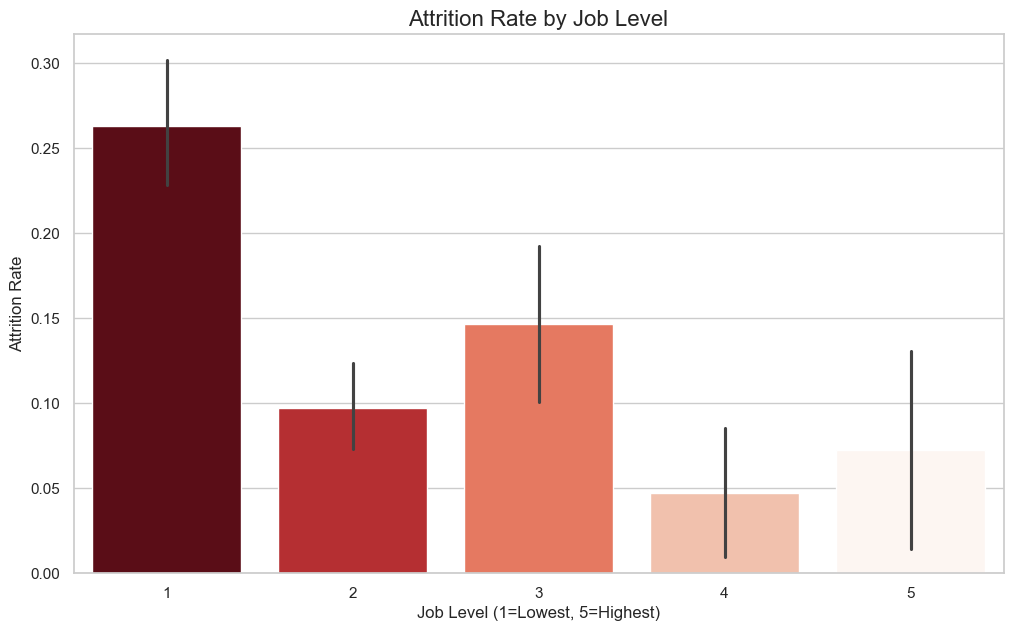

In [142]:
sns.barplot(x='JobLevel', y='Attrition', data=df_processed, palette="Reds_r", hue='JobLevel',legend=False)
plt.title('Attrition Rate by Job Level', fontsize=16)
plt.ylabel('Attrition Rate')
plt.xlabel('Job Level (1=Lowest, 5=Highest)')
plt.show()

#### 5. The Effect of Compensation (Income Distribution)

##### Using a density function (KDE plot), I examine how the income of those who left and those who stayed differs.

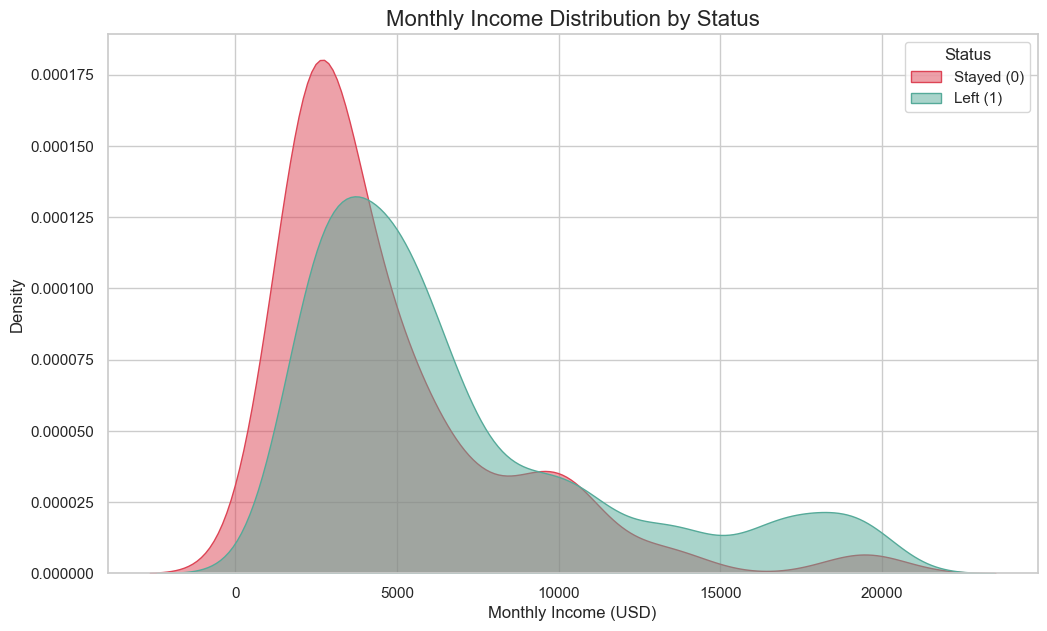

In [145]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_processed, x='MonthlyIncome', hue='Attrition', palette=["#5A9", "#D45"], common_norm=False, fill=True, alpha=0.5)

plt.title('Monthly Income Distribution by Status', fontsize=16)
plt.xlabel('Monthly Income (USD)')
plt.ylabel('Density')
plt.legend(title='Status', labels=['Stayed (0)', 'Left (1)'])
plt.show()

#### 6. Demographic and Temporal Factors (Marital Status & Loyalty)

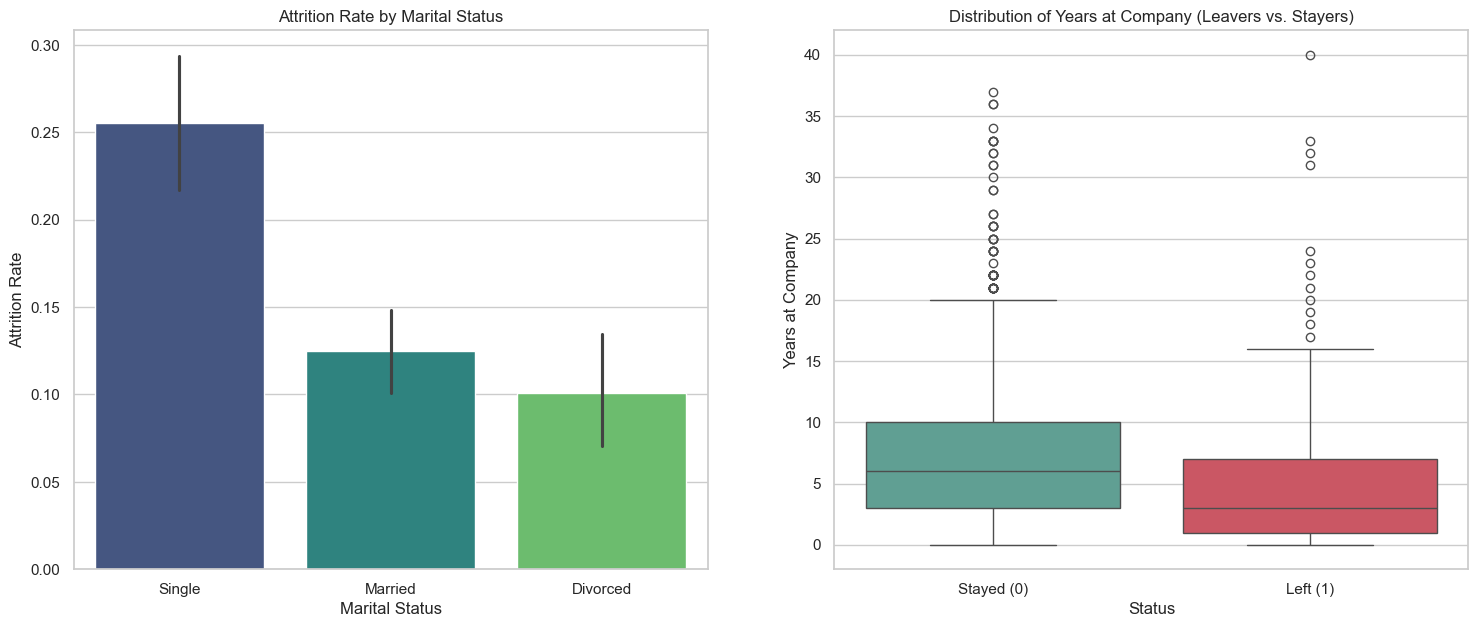

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # Two plots in one row

# Effect of Marital Status
sns.barplot(x='MaritalStatus', y='Attrition', data=df_processed, ax=axes[0], palette="viridis", hue='MaritalStatus',legend=False)
axes[0].set_title('Attrition Rate by Marital Status')
axes[0].set_ylabel('Attrition Rate')
axes[0].set_xlabel('Marital Status')

# Years at Company
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df_processed, ax=axes[1], palette=["#5A9", "#D45"], hue='Attrition',legend=False)
axes[1].set_title('Distribution of Years at Company (Leavers vs. Stayers)')
axes[1].set_ylabel('Years at Company')
axes[1].set_xlabel('Status')
axes[1].set_xticks([0, 1], ['Stayed (0)', 'Left (1)'])

plt.show()

#### 7. Correlation Matrix (Heatmap)

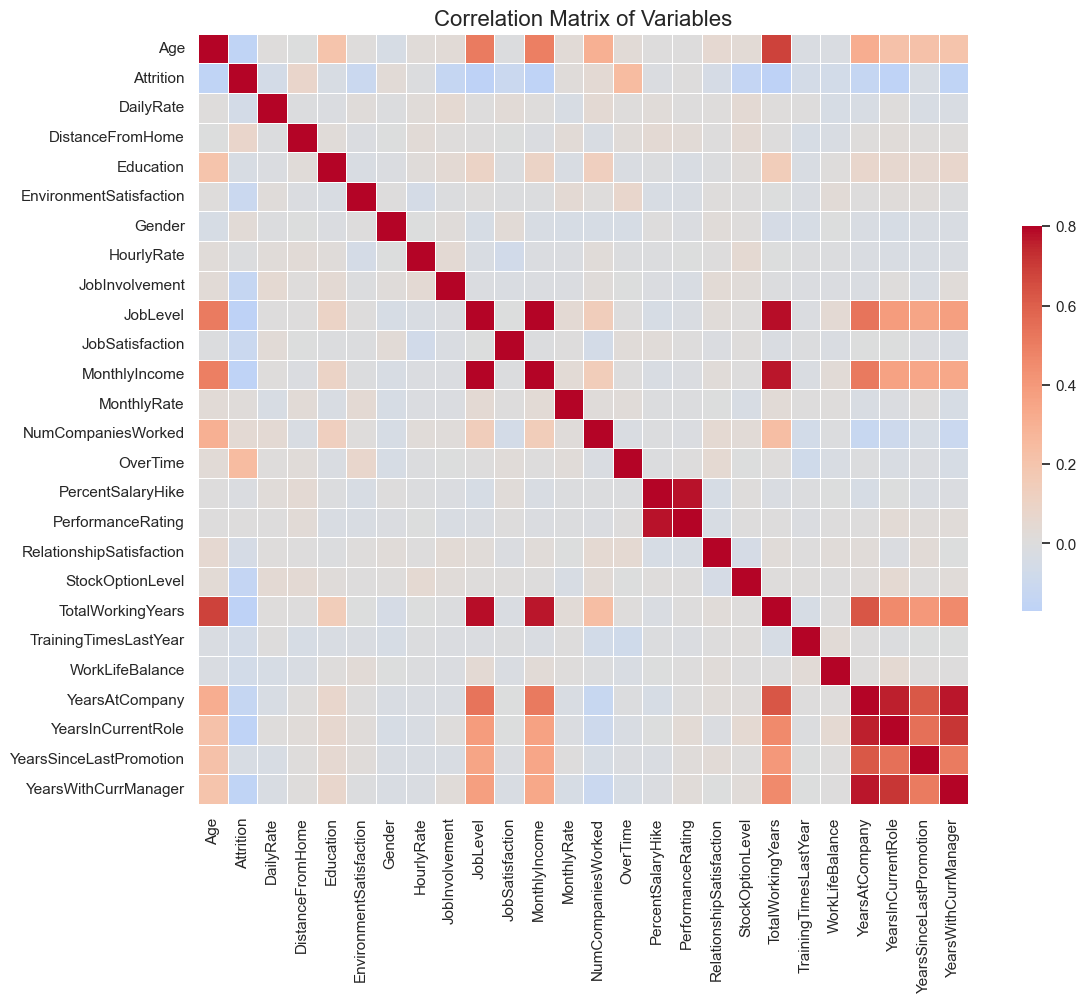

In [151]:
plt.figure(figsize=(14, 10))

numeric_df = df_processed.select_dtypes(include=[np.number])

corr = numeric_df.corr()

sns.heatmap(corr, 
            cmap='coolwarm', 
            vmax=.8, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            annot=False)

plt.title('Correlation Matrix of Variables', fontsize=16)
plt.show()

### PHASE 4: MODELING AND EVALUATION

#### 1. Data Splitting and Scaling

In [153]:
y = df_model_ready['Attrition']
X = df_model_ready.drop('Attrition', axis=1)

# Creating training and test sets
# Since the target variable distribution is imbalanced (16% churn), using the 'stratify=y' parameter is mandatory to ensure proportional sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print("Data successfully split:")
print(f"Training set (X_train) size: {X_train.shape}")
print(f"Test set (X_test) size: {X_test.shape}")
print(f"Attrition rate in training set (y_train): {y_train.mean():.1%}")
print(f"Attrition rate in test set (y_test): {y_test.mean():.1%}")

Data successfully split:
Training set (X_train) size: (1029, 44)
Test set (X_test) size: (441, 44)
Attrition rate in training set (y_train): 16.1%
Attrition rate in test set (y_test): 16.1%


In [155]:
# Scaling (Standardization)
# Logistic Regression is sensitive to variable scales (e.g., Age vs. Salary),
# so I apply Z-score normalization (StandardScaler).

# We only scale numerical variables; binaries do not need it.
original_numeric_cols = df_processed.select_dtypes(include=np.number).columns.drop(['Attrition', 'OverTime', 'Gender'])

scaler = StandardScaler()

# Creating copies of scaled DataFrames
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# IMPORTANT: The scaler is fitted only on the training data to avoid data leakage!
X_train_scaled[original_numeric_cols] = scaler.fit_transform(X_train[original_numeric_cols])
X_test_scaled[original_numeric_cols] = scaler.transform(X_test[original_numeric_cols])

print("Variables standardized.")

Variables standardized.


#### 2. Baseline Model: Logistic Regression

##### First, I build a simpler linear model as a reference.
##### To handle imbalance, I use the 'class_weight=balanced' parameter.

In [158]:
print("\n--- Model 1: Logistic Regression ---")
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1] # Valószínűségek az AUC-hoz

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Stayed (0)', 'Left (1)']))
print(f"ROC-AUC Pontszám: {roc_auc_score(y_test, y_prob_log_reg):.3f}")


--- Model 1: Logistic Regression ---
Confusion Matrix:
[[285  85]
 [ 21  50]]

Classification Report:
              precision    recall  f1-score   support

  Stayed (0)       0.93      0.77      0.84       370
    Left (1)       0.37      0.70      0.49        71

    accuracy                           0.76       441
   macro avg       0.65      0.74      0.66       441
weighted avg       0.84      0.76      0.79       441

ROC-AUC Pontszám: 0.817


**Observation:** The model achieves high Recall for leavers but with low Precision. This indicates a high rate of "false alarms," which can be costly from a business perspective.

#### 2.1 Logistic Regression: Confusion Matrix Heatmap

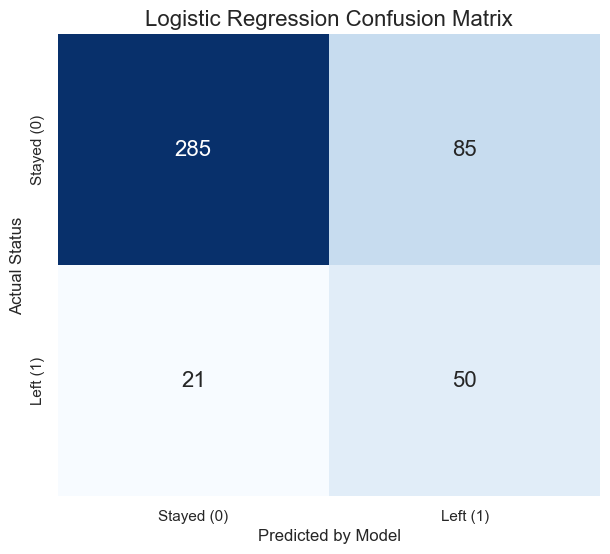

In [161]:
# --- Logistic Regression: Confusion Matrix Heatmap ---
# Visualizing model performance: intersection of predicted and actual classes.

plt.figure(figsize=(7, 6))
cm_log = confusion_matrix(y_test, y_pred_log_reg)

# Creating heatmap with annotations
sns.heatmap(cm_log, 
            annot=True, 
            fmt='d',    
            cmap='Blues', 
            cbar=False,
            xticklabels=['Stayed (0)', 'Left (1)'],
            yticklabels=['Stayed (0)', 'Left (1)'],
            annot_kws={"size": 16}) 

plt.title('Logistic Regression Confusion Matrix', fontsize=16)
plt.xlabel('Predicted by Model', fontsize=12)
plt.ylabel('Actual Status', fontsize=12)
plt.show()

#### 3. Advanced Model: Random Forest (Ensemble)

##### I apply a tree-based ensemble method to capture non-linear relationships.
##### RESEARCH DECISION: Instead of automatic weighting, I apply manual weighting (1:6) for the minority class to fine-tune the balance between Recall and Precision.

In [164]:
print("\n--- Model 2: Random Forest Training (Manual Weighting) ---")

weights = {0: 1, 1: 6} 
rf = RandomForestClassifier(class_weight=weights, random_state=42, n_estimators=100)

rf.fit(X_train_scaled, y_train) # Using scaled data for consistency

# Predictions and evaluation
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Stayed (0)', 'Left (1)']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_rf):.3f}")


--- Model 2: Random Forest Training (Manual Weighting) ---
Confusion Matrix:
[[366   4]
 [ 63   8]]

Classification Report:
              precision    recall  f1-score   support

  Stayed (0)       0.85      0.99      0.92       370
    Left (1)       0.67      0.11      0.19        71

    accuracy                           0.85       441
   macro avg       0.76      0.55      0.55       441
weighted avg       0.82      0.85      0.80       441

ROC-AUC Score: 0.772


#### 3.1 Random Forest: Konfúziós Mátrix Heatmap

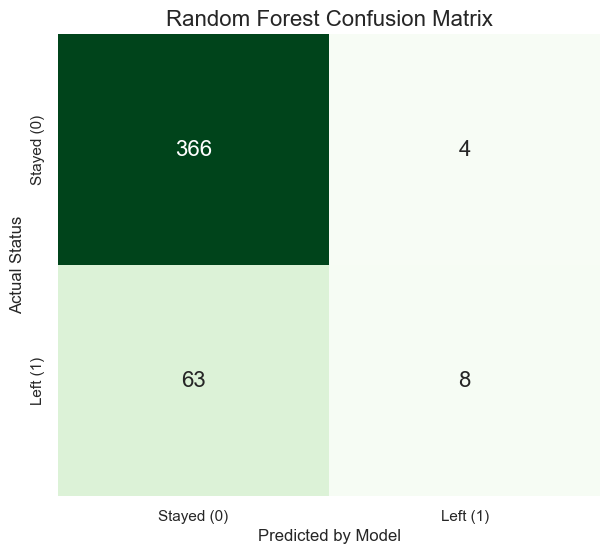

In [166]:
# Confusion Matrix for the Weighted Random Forest model.
# It makes visibly more conservative decisions (fewer false positives).

plt.figure(figsize=(7, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, 
            annot=True, 
            fmt='d', 
            cmap='Greens',  
            cbar=False,
            xticklabels=['Stayed (0)', 'Left (1)'],
            yticklabels=['Stayed (0)', 'Left (1)'],
            annot_kws={"size": 16})

plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xlabel('Predicted by Model', fontsize=12)
plt.ylabel('Actual Status', fontsize=12)
plt.show()

### PHASE 5: EXPLAINABLE AI (XAI) - SHAP ANALYSIS

##### Since Random Forest is a "Black Box" model, I use the SHAP (SHapley Additive exPlanations) game-theoretic methodology to make the decision mechanism transparent.
##### This allows us to see not only the prediction but also the underlying drivers.

In [169]:
shap.initjs()

# Using TreeExplainer for the tree-based model
explainer = shap.TreeExplainer(rf)
shap_explanation = explainer(X_test_scaled)

print("SHAP values calculated.")

SHAP values calculated.


#### Global Feature Importance


Global SHAP Summary Plot (What is important to the model?):


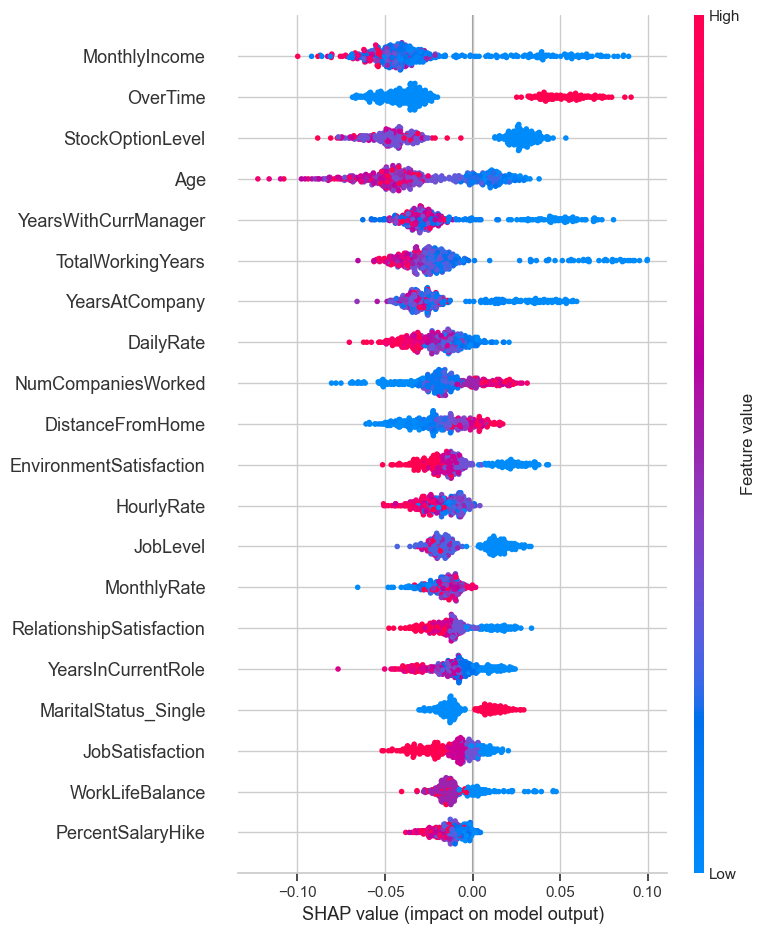

In [172]:
print("\nGlobal SHAP Summary Plot (What is important to the model?):")
shap.summary_plot(shap_explanation[:,:,1])

**Key Finding:** 
##### 1. Low 'MonthlyIncome' (blue dots on the right) strongly increases the risk of attrition.
##### 2. The presence of 'OverTime' (red dots on the right) is also a strong risk factor.
##### 3. Lack of 'StockOptionLevel' (blue) increases turnover.

#### Calculation of SHAP Values

In [177]:
shap_importance = np.abs(shap_explanation.values[:,:,1]).mean(axis=0)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': shap_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("TOP 5 FEATURE IMPORTANCE")
print(importance_df.head(5))

TOP 5 FEATURE IMPORTANCE
                 Feature  Importance
10         MonthlyIncome    0.044565
13              OverTime    0.043292
17      StockOptionLevel    0.038307
0                    Age    0.034897
24  YearsWithCurrManager    0.033294


#### Dependence Plot


Detailed Impact Analysis: Monthly Income


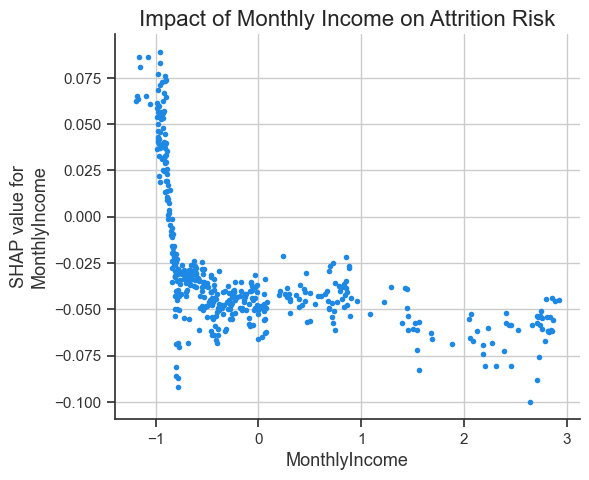

In [179]:
print("\nDetailed Impact Analysis: Monthly Income")
shap.dependence_plot("MonthlyIncome", shap_explanation.values[:,:,1], X_test_scaled, interaction_index=None, show=False)
plt.title("Impact of Monthly Income on Attrition Risk", fontsize=16)
plt.show()


Impact of YearsAtCompany on Attrition


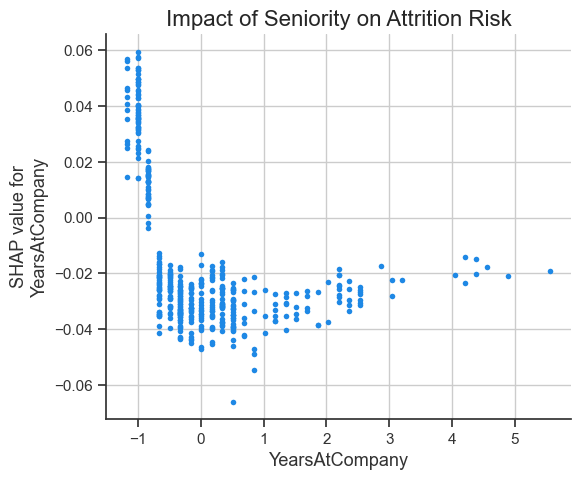

In [182]:
print("\nImpact of YearsAtCompany on Attrition")
shap.dependence_plot("YearsAtCompany", shap_explanation.values[:,:,1], X_test_scaled, interaction_index=None, show=False)
plt.title("Impact of Seniority on Attrition Risk", fontsize=16)
plt.show()

In [184]:
# Analyzing a high-risk case (prediction=1, actual=1)
high_risk_index_loc = X_test_scaled.reset_index(drop=True).index[ (y_test.values == 1) & (y_pred_rf == 1) ][0]
print(f"Analysis of High-Risk Case (index: {high_risk_index_loc}):")

shap.force_plot(shap_explanation[high_risk_index_loc, :, 1])

Analysis of High-Risk Case (index: 17):


In [186]:
# Analyzing a low-risk case (prediction=0, actual=0)
low_risk_index_loc = X_test_scaled.reset_index(drop=True).index[ (y_test.values == 0) & (y_pred_rf == 0) ][0]
print(f"Analysis of Low-Risk Case (index: {low_risk_index_loc}):")

shap.force_plot(shap_explanation[low_risk_index_loc, :, 1])

Analysis of Low-Risk Case (index: 0):


### PHASE 6: EXPORT FOR POWER BI

##### I attach the model results and probabilities to the original data, then export it to CSV format to create an executive dashboard in Power BI.

In [190]:
# 1. Filtering original data to the test set
df_powerbi_final = df_processed.loc[y_test.index].copy()

# 2. Adding Predictions and Probabilities
df_powerbi_final['Attrition_Predicted_RF'] = pd.Series(y_pred_rf, index=y_test.index)
df_powerbi_final['Attrition_Probability_RF'] = pd.Series(y_prob_rf, index=y_test.index)

# 3. Exporting
export_filename = 'ibm_attrition_for_powerbi.csv'
df_powerbi_final.to_csv(export_filename, index=False, encoding='utf-8-sig') # 'utf-8-sig' for special character support

print(f"\nExport successful: File '{export_filename}' created.")
print("The dataset is ready for Power BI integration.")


Export successful: File 'ibm_attrition_for_powerbi.csv' created.
The dataset is ready for Power BI integration.
